# Bibliotecas e Configurações

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

lojas = pd.read_csv('/content/Walmart.csv')

In [ ]:
pd.set_option('display.precision',2)
lojas['Date'] =  pd.to_datetime(lojas['Date'], format='%d-%m-%Y')
lojas['year'] = pd.DatetimeIndex(lojas['Date']).year

# Informções Gerais

In [ ]:
lojas.drop(['Temperature','Fuel_Price'],axis=1,inplace=True)

In [ ]:
lojas.head()

,Store,Date,Weekly_Sales,Holiday_Flag,CPI,Unemployment,year
0,1,2010-02-05,1.64e+06,0,211.10,8.11,2010
1,1,2010-02-12,1.64e+06,1,211.24,8.11,2010
2,1,2010-02-19,1.61e+06,0,211.29,8.11,2010
3,1,2010-02-26,1.41e+06,0,211.32,8.11,2010
4,1,2010-03-05,1.55e+06,0,211.35,8.11,2010


In [ ]:
lojas.describe()

,Store,Weekly_Sales,Holiday_Flag,CPI,Unemployment,year
count,6435.00,6.44e+03,6435.00,6435.00,6435.00,6435.00
mean,23.00,1.05e+06,0.07,171.58,8.00,2010.97
std,12.99,5.64e+05,0.26,39.36,1.88,0.80
min,1.00,2.10e+05,0.00,126.06,3.88,2010.00
25%,12.00,5.53e+05,0.00,131.74,6.89,2010.00
50%,23.00,9.61e+05,0.00,182.62,7.87,2011.00
75%,34.00,1.42e+06,0.00,212.74,8.62,2012.00
max,45.00,3.82e+06,1.00,227.23,14.31,2012.00


In [ ]:
# Sem valores nulos
lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   CPI           6435 non-null   float64       
 5   Unemployment  6435 non-null   float64       
 6   year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 352.0 KB


# Preço Médio por Loja

In [ ]:
precoMedio = lojas.groupby(['Store']).agg({'Weekly_Sales':'mean'}).reset_index()

In [ ]:
precoMedio = precoMedio.sort_values(by='Weekly_Sales',ascending=False)

In [ ]:
# Preço Médio por loja
precoMedio.head()

,Store,Weekly_Sales
19,20,2.11e+06
3,4,2.09e+06
13,14,2.02e+06
12,13,2.00e+06
1,2,1.93e+06


# Correlação entre Variáveis

In [ ]:
lojas.corr()['Weekly_Sales']

Store          -0.34
Weekly_Sales    1.00
Holiday_Flag    0.04
CPI            -0.07
Unemployment   -0.11
year           -0.02
Name: Weekly_Sales, dtype: float64

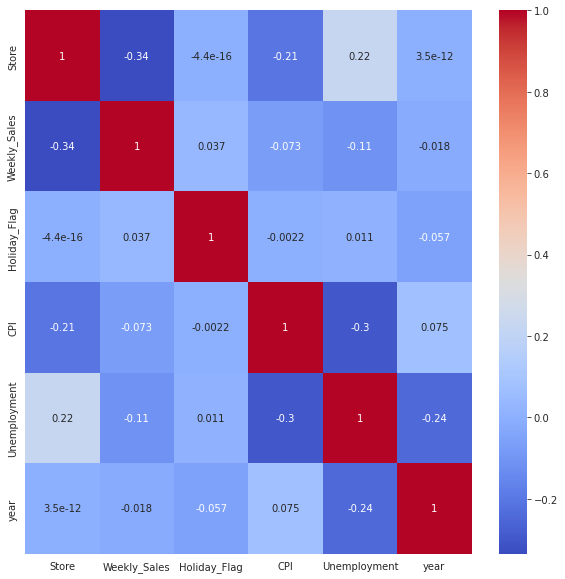

In [38]:
# A única variável que tem uma correlação que faça sentido, é a taxa de desemprego
# Já que se a taxa de desemprego subir, obviamente menos pessoas teriam dinheiro para realizar compras
# Com isso ela tem uma correlação negativa, mesmo que seja baixa
plt.figure(figsize=(10, 10))

sns.heatmap(lojas.corr(), annot=True, cmap='coolwarm');


# Loja com maior vendas acumuladas

In [ ]:
vendasAcum = lojas.groupby(['Store']).agg({'Weekly_Sales':'sum'}).reset_index()
vendasAcum = vendasAcum.sort_values(by='Weekly_Sales',ascending=False)

In [ ]:
# Loja número 20 teve o maior número de vendas acumulado
vendasAcum.head()

,Store,Weekly_Sales
19,20,3.01e+08
3,4,3.00e+08
13,14,2.89e+08
12,13,2.87e+08
1,2,2.75e+08


In [ ]:
# DataFrame somente com a loja 20
loja20 = lojas[lojas['Store']==20]
loja20.head()

,Store,Date,Weekly_Sales,Holiday_Flag,CPI,Unemployment,year
2717,20,2010-02-05,2.40e+06,0,204.25,8.19,2010
2718,20,2010-02-12,2.11e+06,1,204.39,8.19,2010
2719,20,2010-02-19,2.16e+06,0,204.43,8.19,2010
2720,20,2010-02-26,1.90e+06,0,204.46,8.19,2010
2721,20,2010-03-05,2.12e+06,0,204.49,8.19,2010


In [ ]:
# Média semanal de vendas geral
mediaMaior = lojas['Weekly_Sales'].mean()
mediaMaior

1046964.8775617715

In [ ]:
results_loja20 = loja20[loja20['Weekly_Sales']>mediaMaior]
results_loja20.head()

,Store,Date,Weekly_Sales,Holiday_Flag,CPI,Unemployment,year
2717,20,2010-02-05,2.40e+06,0,204.25,8.19,2010
2718,20,2010-02-12,2.11e+06,1,204.39,8.19,2010
2719,20,2010-02-19,2.16e+06,0,204.43,8.19,2010
2720,20,2010-02-26,1.90e+06,0,204.46,8.19,2010
2721,20,2010-03-05,2.12e+06,0,204.49,8.19,2010


In [ ]:
# A loja 20 ultrapassou a média geral em todas as semanas do período (143 semanas)
results_loja20.shape

(143, 7)

# Graficos da máxima, mínima e media

In [ ]:
lojasComp = pd.pivot_table(lojas, values=['Weekly_Sales'], index=['Store','year'],
                    aggfunc={'Weekly_Sales': [sum,min, max, np.mean]}).reset_index()

In [ ]:
lojasComp.head()

Store  year Weekly_Sales                              
                       max      mean       min       sum
0     1  2010     2.39e+06  1.53e+06  1.35e+06  7.33e+07
1     1  2011     2.27e+06  1.56e+06  1.32e+06  8.09e+07
2     1  2012     1.90e+06  1.59e+06  1.32e+06  6.82e+07
3     2  2010     3.44e+06  1.98e+06  1.72e+06  9.53e+07
4     2  2011     3.22e+06  1.90e+06  1.65e+06  9.86e+07

## Faturamento Máximo (Semana com maior Faturamento)

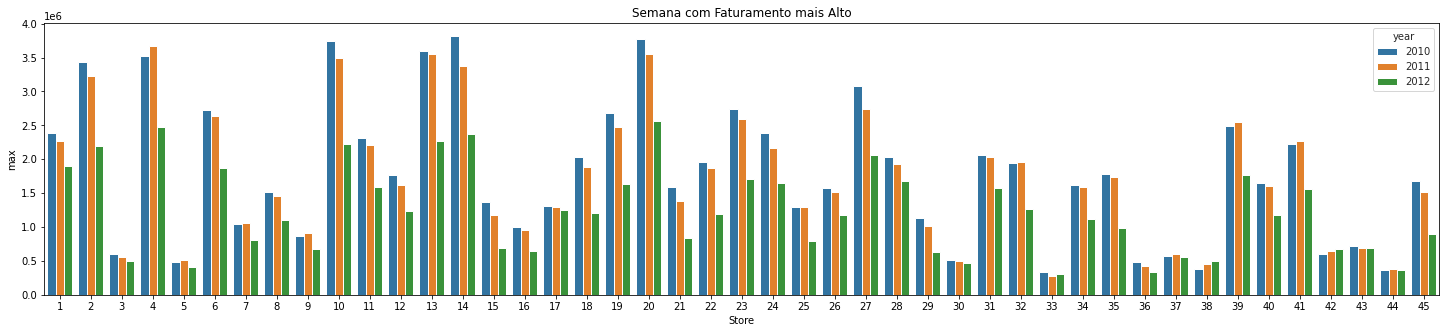

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(25,5))
plt.title('Semana com Faturamento mais Alto')
sns.set_style("whitegrid") 
sns.barplot(data=lojasComp, x="Store", y=lojasComp['Weekly_Sales']['max'], hue='year');

## Faturamento Mínimo (Semana com Menor Faturamento)

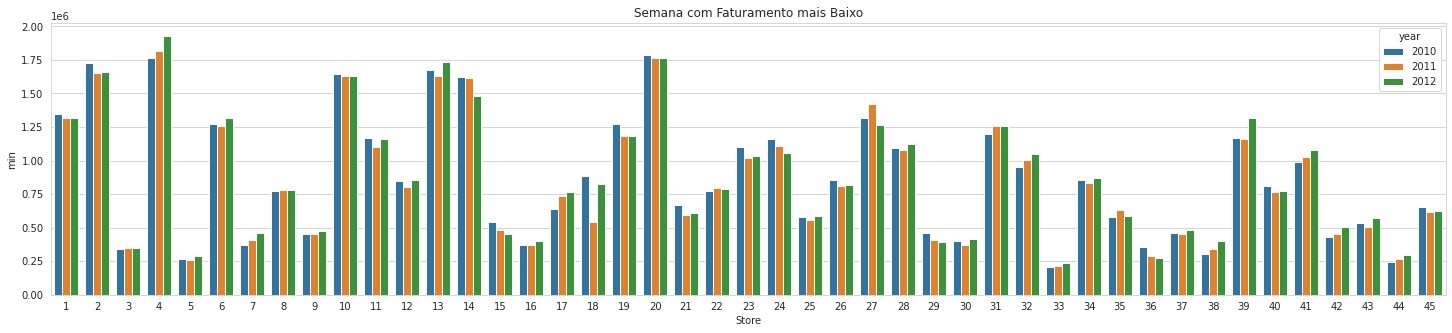

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(25,5))
plt.title('Semana com Faturamento mais Baixo')
sns.set_style("whitegrid") 
sns.barplot(data=lojasComp, x="Store", y=lojasComp['Weekly_Sales']['min'], hue='year');

## Faturamento Médio

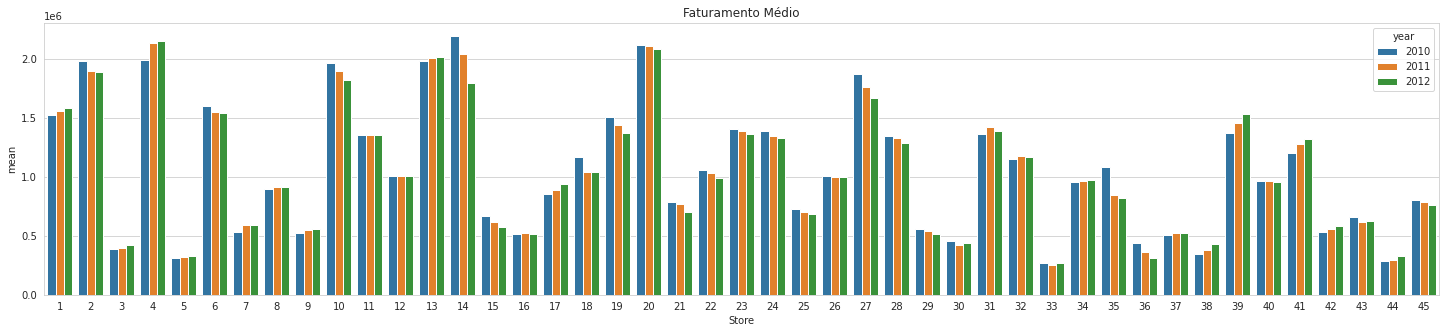

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(25,5))
plt.title('Faturamento Médio')
sns.set_style("whitegrid") 
sns.barplot(data=lojasComp, x="Store", y=lojasComp['Weekly_Sales']['mean'], hue='year');

# Feriados

As semanas que contém feriados vendem mais do que a semanas com dias normais, como é mostrado no gráfico abaixo, a média das semanas com feriado é mais alta.

In [ ]:
feriado = lojas.groupby(['Holiday_Flag']).mean().reset_index()

In [41]:

fig = go.Figure()
fig.add_trace(go.Bar(
    x=feriado['Holiday_Flag'],
    y=feriado['Weekly_Sales'],
    marker_color='blue',
))
fig.update_layout( 
    xaxis=dict(
        title='Dias Normais X Feriado',
        titlefont_size=16,
        tickfont_size=16,
    ),
    legend=dict(
        x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ))
fig.update_layout(title='Vinho',
                  autosize=False,
                  width=800,
                  height=500,
                  margin=dict(l=5, r=5, b=6, t=5))

fig.show()

# Loja para Expansão

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=vendasAcum['Store'],
    y=vendasAcum['Weekly_Sales'],
    marker_color='blue'
))
fig.update_layout( # Config gerais:
    xaxis=dict(
        title='Vendas Acumuladas', # Nome do eixoX
        titlefont_size=16, # Tamanho do nome
        tickfont_size=16, # Tamanho dos infos(Números)
    ),
    legend=dict(
        x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)', # Background-color da legenda
        bordercolor='rgba(255, 255, 255, 0)' # Cor da borda
    ))


In [ ]:
# Filtrando top 5 lojas com maior faturamento
topLojas = lojas[lojas.Store.isin([4,20,14,13,2])]

In [ ]:
topLojas.head()

,Store,Date,Weekly_Sales,Holiday_Flag,CPI,Unemployment,year
143,2,2010-02-05,2.14e+06,0,210.75,8.32,2010
144,2,2010-02-12,2.14e+06,1,210.90,8.32,2010
145,2,2010-02-19,2.12e+06,0,210.95,8.32,2010
146,2,2010-02-26,1.87e+06,0,210.98,8.32,2010
147,2,2010-03-05,1.99e+06,0,211.01,8.32,2010


In [ ]:
lojasFilt = pd.pivot_table(topLojas, values=['Weekly_Sales'], index=['Store','year'],
                    aggfunc={'Weekly_Sales': [sum,min, max, np.mean]}).reset_index()

In [ ]:
lojasFilt.head()

Store  year Weekly_Sales                              
                       max      mean       min       sum
0     2  2010     3.44e+06  1.98e+06  1.72e+06  9.53e+07
1     2  2011     3.22e+06  1.90e+06  1.65e+06  9.86e+07
2     2  2012     2.20e+06  1.90e+06  1.66e+06  8.15e+07
3     4  2010     3.53e+06  1.99e+06  1.76e+06  9.57e+07
4     4  2011     3.68e+06  2.14e+06  1.81e+06  1.11e+08

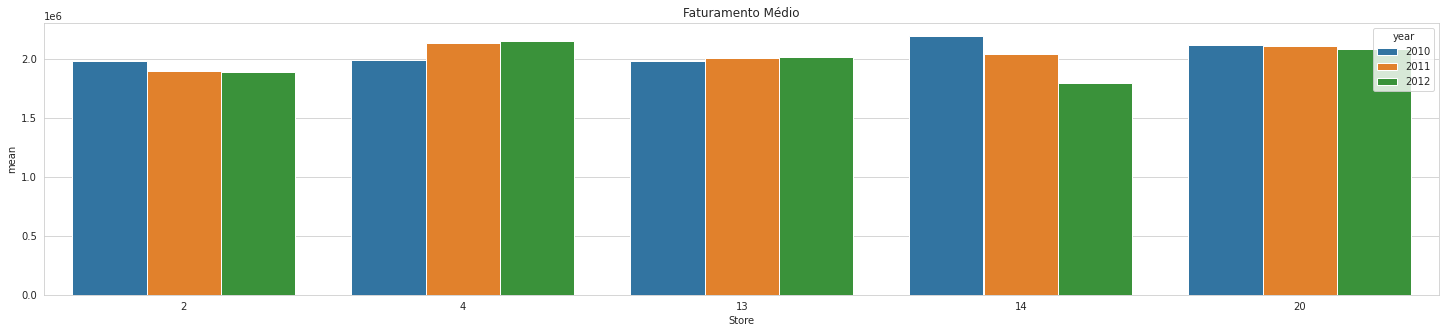

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(25,5))
plt.title('Faturamento Médio')
sns.set_style("whitegrid") 
sns.barplot(data=lojasFilt, x="Store", y=lojasFilt['Weekly_Sales']['mean'], hue='year');

Aqui pode ser visto que a loja número 04 está em uma curva ascendente no faturamento, já a loja 20 é o contrário. E analisando a tabela abaixo pode-se perceber que o índice de desemprego (Unemployment) da loja 04 é abaixo em relação a número 20, logo essa loja pode alcançar um número maior de possíveis clientes, aumentando ainda mais o seu faturamento.

In [ ]:
LojasFim = lojas[lojas.Store.isin([4,20])]

In [ ]:
LojasFim.groupby(['Store']).agg({'Weekly_Sales':'mean','CPI':'mean','Unemployment':'mean'}).reset_index()

,Store,Weekly_Sales,CPI,Unemployment
0,4,2.09e+06,128.68,5.96
1,20,2.11e+06,209.04,7.37


In [44]:
loja04 = LojasFim[LojasFim['Store']==4]

In [46]:
loja04.describe()

,Store,Weekly_Sales,Holiday_Flag,CPI,Unemployment,year
count,143.0,1.43e+02,143.00,143.00,143.00,143.00
mean,4.0,2.09e+06,0.07,128.68,5.96,2010.97
std,0.0,2.66e+05,0.26,1.86,1.42,0.80
min,4.0,1.76e+06,0.00,126.06,3.88,2010.00
25%,4.0,1.93e+06,0.00,126.59,4.61,2010.00
50%,4.0,2.07e+06,0.00,129.08,5.95,2011.00
75%,4.0,2.18e+06,0.00,130.50,7.13,2012.00
max,4.0,3.68e+06,1.00,131.19,8.62,2012.00
